# **Öğrendiklerimizi Elden Geçirelim**

## Import

In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [444]:
df = pd.read_csv("salaries_clean.csv")

---
---

## Veri Hakkında

Veriyi buradan aldık: https://data.world/brandon-telle/2016-hacker-news-salary-survey-results

In [445]:
df.head()

,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,1,opower,"san francisco, ca",CA,US,38,-122,systems engineer,Engineering,NaN,13,2,125000,5000,0,5000 shares,Don't work here.,3/21/16 12:58
1,3,walmart,"bentonville, ar",AR,US,36,-94,senior developer,Software,Senior,15,8,65000,NaN,5000,"3,000",NaN,3/21/16 12:58
2,4,vertical knowledge,"cleveland, oh",OH,US,41,-82,software engineer,Software,NaN,4,1,86000,5000,6000,0,NaN,3/21/16 12:59
3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4,0,105000,5000,8500,0,NaN,3/21/16 13:00
4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4,3,110000,5000,7000,150000,NaN,3/21/16 13:02


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary_id                  1655 non-null   int64  
 1   employer_name              1651 non-null   object 
 2   location_name              1655 non-null   object 
 3   location_state             558 non-null    object 
 4   location_country           792 non-null    object 
 5   location_latitude          792 non-null    float64
 6   location_longitude         792 non-null    float64
 7   job_title                  1655 non-null   object 
 8   job_title_category         1655 non-null   object 
 9   job_title_rank             425 non-null    object 
 10  total_experience_years     1608 non-null   float64
 11  employer_experience_years  1608 non-null   float64
 12  annual_base_pay            1651 non-null   float64
 13  signing_bonus              1332 non-null   float

In [447]:
df.isna().sum()

salary_id                       0
employer_name                   4
location_name                   0
location_state               1097
location_country              863
location_latitude             863
location_longitude            863
job_title                       0
job_title_category              0
job_title_rank               1230
total_experience_years         47
employer_experience_years      47
annual_base_pay                 4
signing_bonus                 323
annual_bonus                  319
stock_value_bonus             402
comments                     1363
submitted_at                    0
dtype: int64

In [448]:
len(df)

1655

In [449]:
print("Eksik veri oranı: %", round(df.isnull().sum().sum() / (len(df) * len(df.columns))*100,))

Eksik veri oranı: % 25


In [450]:
df.describe()

,salary_id,location_latitude,location_longitude,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,1655,792,792,1608,1608,1651,1332,1336
mean,1684,38,-65,7,3,6325004,22406,11776
std,933,17,67,6,3,246135277,309799,69216
min,1,-41,-123,0,0,0,0,0
25%,897,37,-103,3,1,61000,0,0
50%,1711,39,-95,5,2,99480,0,500
75%,2477,45,-65,10,3,130000,5000,10000
max,3298,65,174,56,58,9999999999,8999999,2000000


<AxesSubplot:>

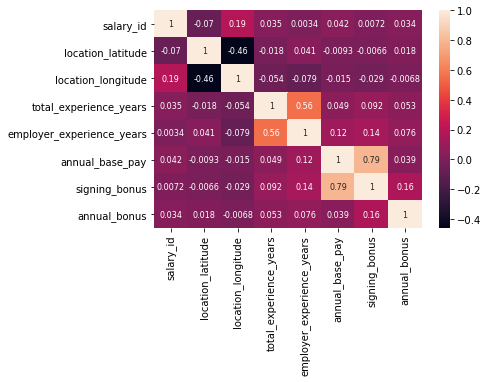

In [451]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size":8})

In [452]:
# df[df["job_title_rank"] == "Intern"]
# Intern maaşlarına bakarsınız diye

---
---

## Temizlik ve Düzenleme

In [453]:
df= df.drop(["salary_id", "location_state", "location_country", "location_latitude","location_longitude",
    "job_title_rank", "location_name", "stock_value_bonus", "comments", "submitted_at"], axis=1)

In [454]:
df.head()

,employer_name,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,opower,systems engineer,Engineering,13,2,125000,5000,0
1,walmart,senior developer,Software,15,8,65000,NaN,5000
2,vertical knowledge,software engineer,Software,4,1,86000,5000,6000
3,netapp,mts,Other,4,0,105000,5000,8500
4,apple,software engineer,Software,4,3,110000,5000,7000


In [455]:
df.isna().sum()

employer_name                  4
job_title                      0
job_title_category             0
total_experience_years        47
employer_experience_years     47
annual_base_pay                4
signing_bonus                323
annual_bonus                 319
dtype: int64

In [456]:
len(df)

1655

In [457]:
df = df.dropna(subset=["employer_name","annual_base_pay"])

In [458]:
len(df)

1647

In [459]:
df.isna().sum()

employer_name                  0
job_title                      0
job_title_category             0
total_experience_years        44
employer_experience_years     44
annual_base_pay                0
signing_bonus                318
annual_bonus                 314
dtype: int64

In [460]:
df[["signing_bonus","annual_bonus"]] = df[["signing_bonus","annual_bonus"]].fillna(0)

In [461]:
df.isna().sum()

employer_name                 0
job_title                     0
job_title_category            0
total_experience_years       44
employer_experience_years    44
annual_base_pay               0
signing_bonus                 0
annual_bonus                  0
dtype: int64

In [462]:
df[["total_experience_years","employer_experience_years"]] = df[["total_experience_years","employer_experience_years"]].fillna(round(df[["total_experience_years","employer_experience_years"]].mean(),))

In [463]:
df.isna().sum()

employer_name                0
job_title                    0
job_title_category           0
total_experience_years       0
employer_experience_years    0
annual_base_pay              0
signing_bonus                0
annual_bonus                 0
dtype: int64

In [464]:
df.head()

,employer_name,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,opower,systems engineer,Engineering,13,2,125000,5000,0
1,walmart,senior developer,Software,15,8,65000,0,5000
2,vertical knowledge,software engineer,Software,4,1,86000,5000,6000
3,netapp,mts,Other,4,0,105000,5000,8500
4,apple,software engineer,Software,4,3,110000,5000,7000


In [465]:
pd.set_option('display.float_format', lambda x: '%0.f' % x)
df["annual_base_pay"].sort_values()


1361            0
1143            0
382             0
18             24
306            28
          ...    
221       9250000
1088     10280000
1639     50000000
1135    156000000
1645   9999999999
Name: annual_base_pay, Length: 1647, dtype: float64

In [466]:
df = df[(df["annual_base_pay"] < 20000000) & (df["annual_base_pay"] > 5000)]

In [467]:
df["annual_base_pay"].sort_values()

590        5160
407        5600
126        6000
1642       6000
1341       6031
         ...   
774     6000000
1191    7500000
298     9000000
221     9250000
1088   10280000
Name: annual_base_pay, Length: 1596, dtype: float64

In [468]:
len(df)

1596

___
___

## Scatter

In [469]:
df.columns

Index(['employer_name', 'job_title', 'job_title_category',
       'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus'],
      dtype='object')

In [470]:
df.rename(columns = {
    'employer_name':'company',
    'job_title':'title',
    'job_title_category':'category',
    'total_experience_years':'total_exp',
    'employer_experience_years':'local_exp',
    'annual_base_pay':'salary'
}, inplace = True)


In [471]:
df.tail(1)

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
1653,of maryland,scientific programmer (faculty research assist...,Applied Science,5,1,75000,0,0


<AxesSubplot:xlabel='total_exp', ylabel='local_exp'>

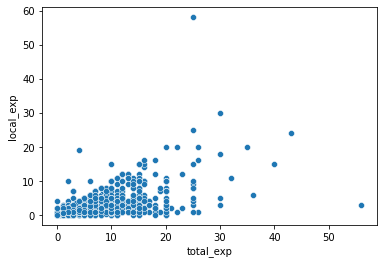

In [472]:
sns.scatterplot(data = df, x="total_exp", y="local_exp")

In [473]:
df["local_exp"].idxmax()

1596

In [474]:
df.loc[1596:1596]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
1596,tom,tom,Other,25,58,250000,250478,150000


In [475]:
df[df["local_exp"]>df["total_exp"]].iloc[8:12]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
339,airbnb,software engineer,Software,0,1,110000,50000,0
347,microsoft,software engineer,Software,1,2,120000,200000,0
447,johns hopkins,phd student,Other,2,4,24000,0,0
605,la michoacana,servidor de aguas,Other,3,7,48000,0,0


In [476]:
df = df[(df["local_exp"] - 1) < df["total_exp"]]

<AxesSubplot:xlabel='total_exp', ylabel='local_exp'>

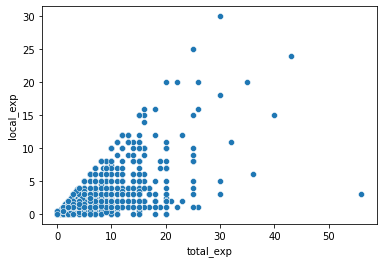

In [ ]:
sns.scatterplot(data = df, x="total_exp", y="local_exp")

In [477]:
df = df.set_index(np.arange(0,len(df)))

In [478]:
df[df["total_exp"]>30]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
31,city of austin,it programmer,Other,40,15,103000,0,1500
319,gg,pres,Other,35,20,75000,2000,3000
920,ibm,advisory software engineer,Software,32,11,111000,0,1200
1340,ghgh,ghghgh,Other,56,3,565656,5656,566
1462,hewlett packard enterprise,software engineer vii,Software,36,6,206000,0,15000
1467,���___�,asdf,Other,43,24,23423,234,2


In [479]:
df.drop(df.index[[1340,1467]], inplace=True)

In [480]:
df.iloc[[1340,1467]]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
1341,ali,pagla dancer,Other,9,5,550000,20000,200000
1469,laika,systems administrator,Management,7,0,77000,0,2000


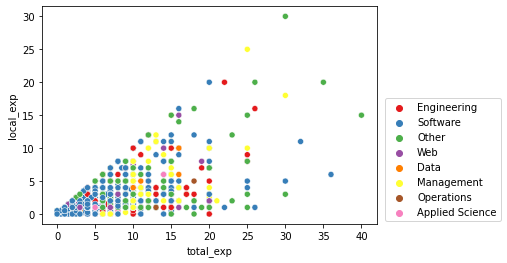

In [489]:
sns.scatterplot(data = df, x="total_exp", y="local_exp", hue="category", palette="Set1")
plt.legend(bbox_to_anchor=(1.01,0.6))

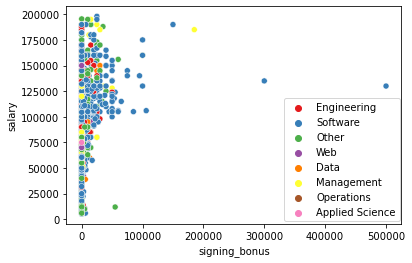

In [568]:
sns.scatterplot(data = df, x="signing_bonus", y="salary", hue="category", palette="Set1")
plt.legend(bbox_to_anchor=(1.01,0.6))

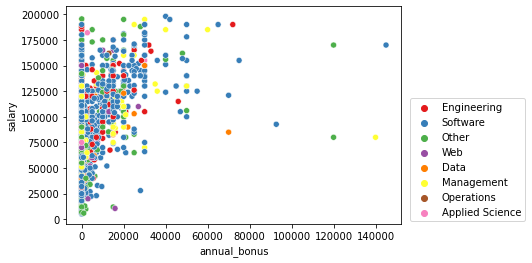

In [569]:
sns.scatterplot(data = df, x="annual_bonus", y="salary", hue="category", palette="Set1")
plt.legend(bbox_to_anchor=(1.01,0.6))

___
___

## Histogram

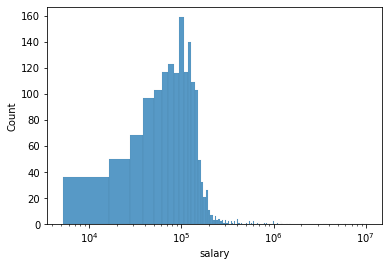

In [491]:
sns.histplot(data=df, x="salary")
plt.xscale("log");

In [494]:
len(df[df["salary"]>200000]) / len(df)

0.05334190231362468

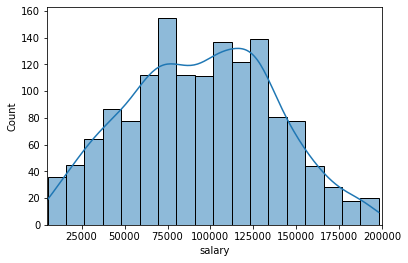

In [520]:
sns.histplot(data=df, x="salary", kde=True)
plt.xlim(5000,200000);

c:\Users\mbatu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mbatu\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


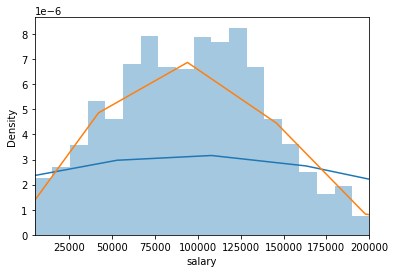

In [515]:
sns.distplot(df["salary"], bins=1000, kde=True)
sns.kdeplot(data=df, x="salary", bw=0.01)
plt.xlim(5000,200000);

In [517]:
df = df[df["salary"]<200000]

<AxesSubplot:xlabel='salary', ylabel='Count'>

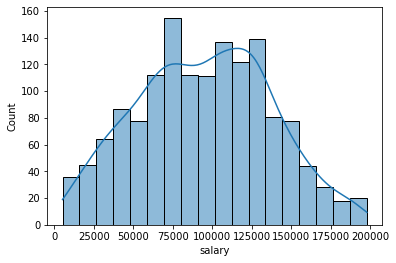

In [519]:
sns.histplot(data=df, x="salary", kde=True)

In [525]:
df["category"].unique()

array(['Engineering', 'Software', 'Other', 'Web', 'Data', 'Management',
       'Operations', 'Applied Science'], dtype=object)

___
___

## Count Plot

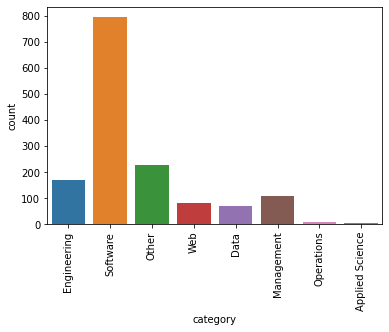

In [564]:
sns.countplot(data= df, x="category")
plt.xticks(rotation=90);


In [566]:
df.value_counts("category")

category
Software           795
Other              229
Engineering        171
Management         108
Web                 80
Data                70
Operations           8
Applied Science      6
dtype: int64

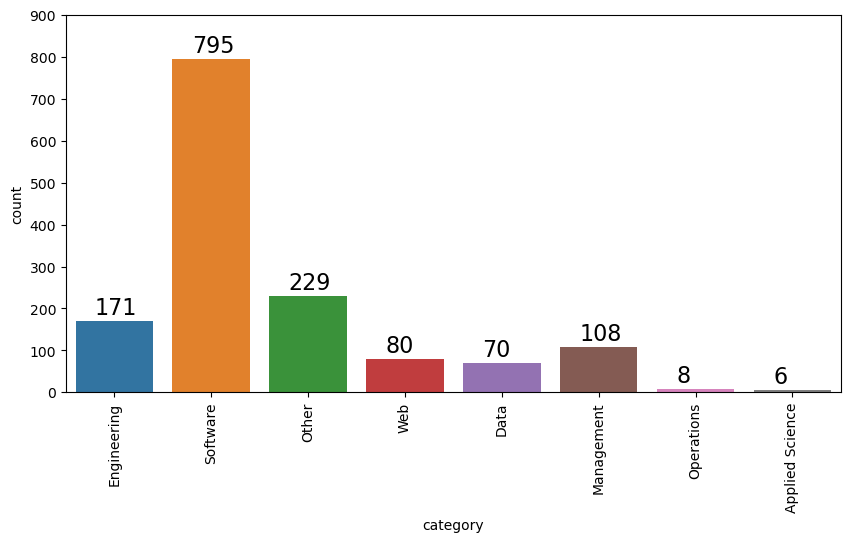

In [565]:
plt.figure(figsize=(10,5), dpi=100)
ax = sns.countplot(data= df, x="category")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+16), size=16)

plt.xticks(rotation=90)
plt.ylim(0,900);

---
---

## KDE Plot

<AxesSubplot:xlabel='local_exp', ylabel='Density'>

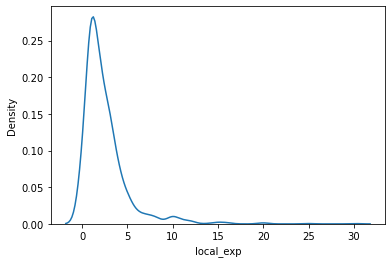

In [574]:
sns.kdeplot(data=df, x="local_exp")

<AxesSubplot:xlabel='local_exp', ylabel='Density'>

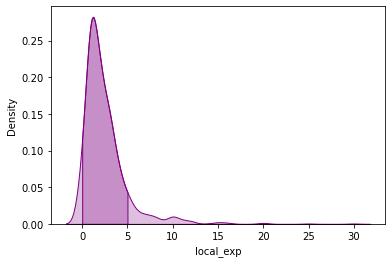

In [573]:
sns.kdeplot(data=df, x="local_exp", clip=[0,5], fill=True, color="purple")
sns.kdeplot(data=df, x="local_exp", fill=True, color="purple")

<AxesSubplot:xlabel='local_exp', ylabel='Density'>

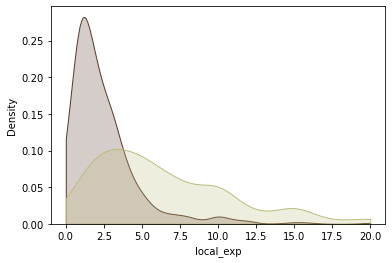

In [585]:
sns.kdeplot(data=df, x="local_exp", clip=[0,20], fill=True, color="#5B3A29")
sns.kdeplot(data=df, x="total_exp", clip=[0,20], fill=True, color="#BEBD7F")

<AxesSubplot:xlabel='salary', ylabel='Density'>

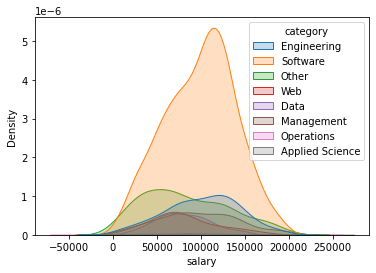

In [586]:
sns.kdeplot(data=df, x="salary", fill=True, hue="category")

___
---

## Box & Violin plot

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Engineering'),
  Text(1, 0, 'Software'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Web'),
  Text(4, 0, 'Data'),
  Text(5, 0, 'Management'),
  Text(6, 0, 'Operations'),
  Text(7, 0, 'Applied Science')])

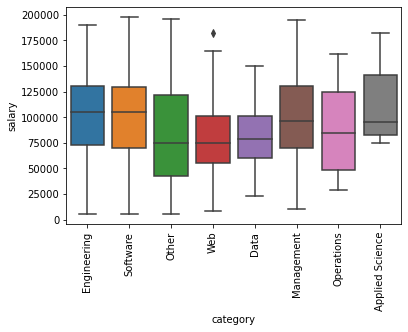

In [527]:
sns.boxplot(data=df, x="category", y="salary")
plt.xticks(rotation= 90);

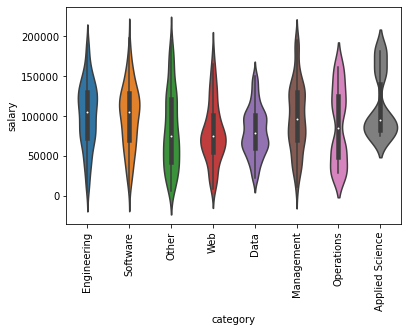

In [531]:
sns.violinplot(data=df, x="category", y="salary", bw=0.3)
plt.xticks(rotation= 90);

___
___

# **Eline Sağlık Fakir**